_05839: Interactive Data Science_
_Instructor: John Stamper_

_Final Project_

__Topic: Plastic Pollution__<br>
__Submitted by: mmalani__ <br>

_Data and information reference: https://ourworldindata.org/plastic-pollution_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast

sns.set()
%matplotlib inline

import chardet
sns.set(style="whitegrid", color_codes=True)

In [2]:
# WORLD 01 : Plastic Production

file_World_01 = "PlasticPollution\global-plastics-production.csv"
with open(file_World_01, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_World_01 = pd.read_csv(file_World_01, encoding='ISO-8859-1')

# Updated file
df_World01 = df_og_World_01.copy(deep=True)
df_World01

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000
...,...,...,...,...
61,World,OWID_WRL,2011,325000000
62,World,OWID_WRL,2012,338000000
63,World,OWID_WRL,2013,352000000
64,World,OWID_WRL,2014,367000000


In [3]:
df_World01 = df_World01.dropna(how = "all")

# Checking no. of data columns
len(df_World01)

66

In [4]:
df_World01.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Global plastics production (million tonnes)': dtype('int64')}

In [5]:
# Drop Entity and Code column
df_World01 = df_World01.drop('Entity', 1)
df_World01 = df_World01.drop('Code', 1)


# Renaming columns
df_World01 = df_World01.rename(columns={'Global plastics production (million tonnes)': 'Production (million tonnes)'})
                               
df_World01

,Year,Production (million tonnes)
0,1950,2000000
1,1951,2000000
2,1952,2000000
3,1953,3000000
4,1954,3000000
...,...,...
61,2011,325000000
62,2012,338000000
63,2013,352000000
64,2014,367000000


[Text(0, 0.5, 'Production (million tonnes)'), Text(0.5, 0, 'Year')]

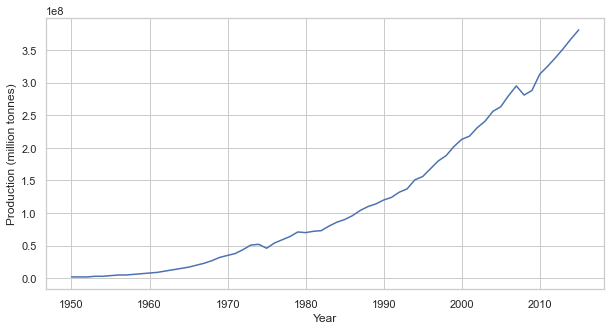

In [6]:
# World 01 - Plot: Line chart

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=df_World01, x="Year", y="Production (million tonnes)")
ax.set(xlabel="Year", ylabel="Production (million tonnes)")

__Global 01: Plastic Production__
<br>
<font color=Gray>
- Significant increase in production of plastic over the last 50 years. <br>
- The short downturn in annual production in 2009 and 2010 was predominantly the result of the 2008 global financial crisis — a similar dent is seen across several metrics of resource production and consumption, including energy.
</font>

__----------------------------------------------__

In [7]:
# WORLD 02 : Cumulative Plastic Production

file_World_02 = "PlasticPollution\cumulative-global-plastics.csv"
with open(file_World_02, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_World_02 = pd.read_csv(file_World_01, encoding='ISO-8859-1')

# Updated file
df_World02 = df_og_World_02.copy(deep=True)
df_World02

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000
...,...,...,...,...
61,World,OWID_WRL,2011,325000000
62,World,OWID_WRL,2012,338000000
63,World,OWID_WRL,2013,352000000
64,World,OWID_WRL,2014,367000000


In [8]:
df_World02 = df_World02.dropna(how = "all")

# Checking no. of data columns
len(df_World02)

66

In [9]:
df_World02.dtypes.to_dict()

{'Entity': dtype('O'),
 'Code': dtype('O'),
 'Year': dtype('int64'),
 'Global plastics production (million tonnes)': dtype('int64')}

In [10]:
# Drop Entity and Code column
df_World02 = df_World02.drop('Entity', 1)
df_World02 = df_World02.drop('Code', 1)


# Renaming columns
df_World02 = df_World02.rename(columns={'Global plastics production (million tonnes)': 'Production (million tonnes)'})
                               
df_World02

,Year,Production (million tonnes)
0,1950,2000000
1,1951,2000000
2,1952,2000000
3,1953,3000000
4,1954,3000000
...,...,...
61,2011,325000000
62,2012,338000000
63,2013,352000000
64,2014,367000000


In [11]:
years = list(df_World02["Year"])[::5]
production = list(df_World02["Production (million tonnes)"])[::5]
# production

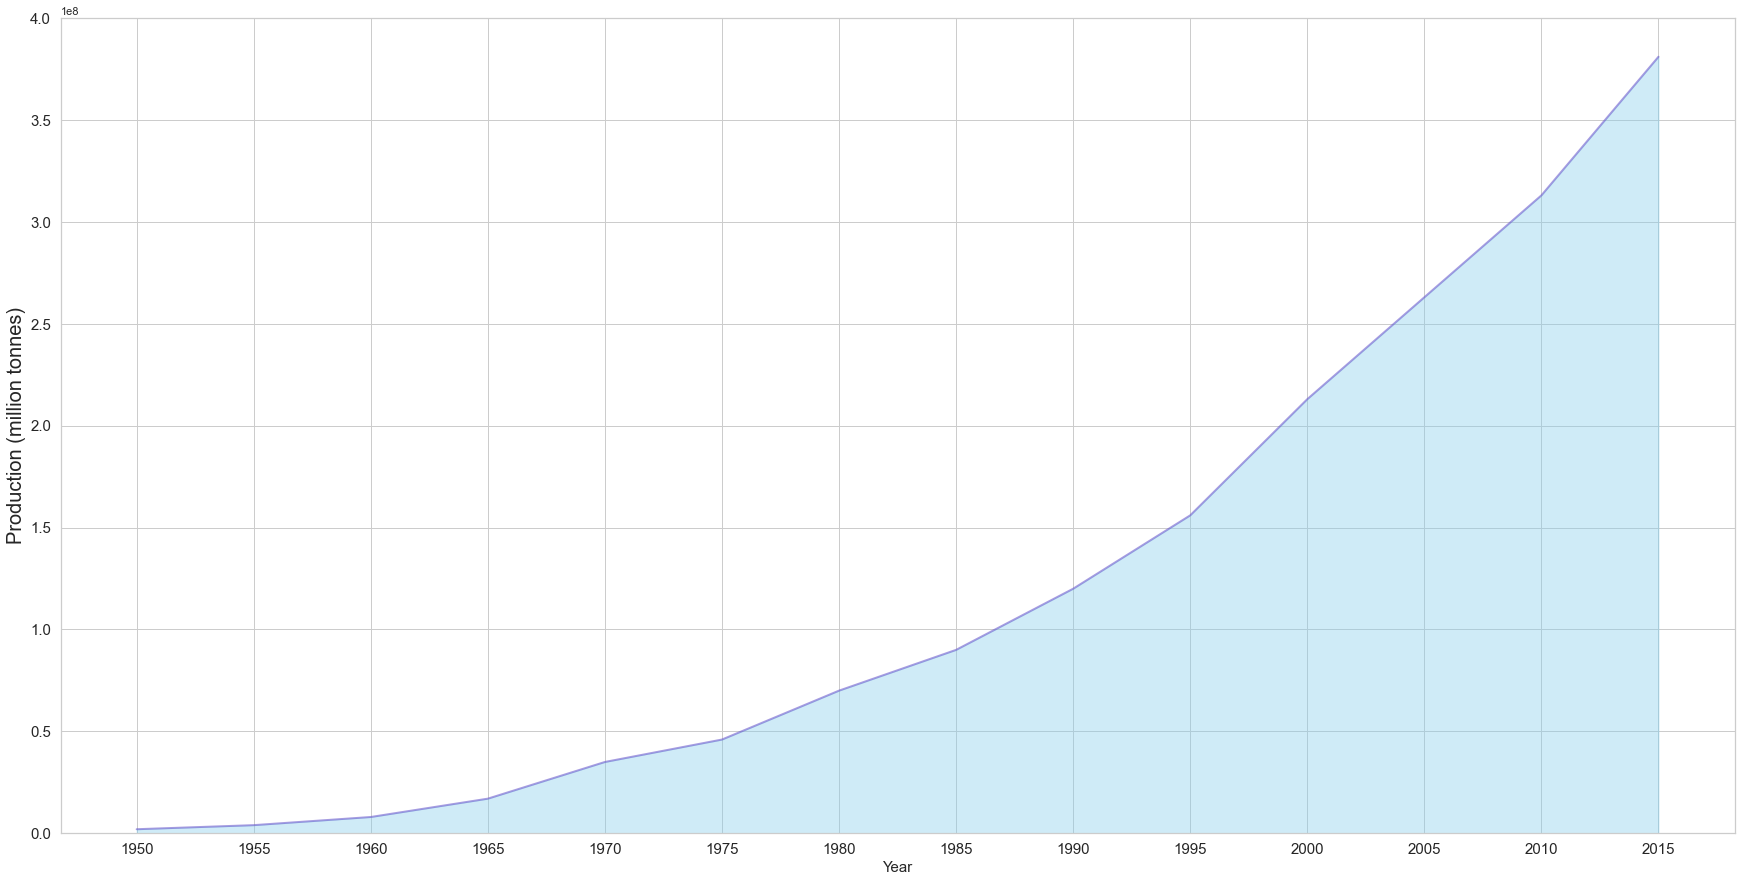

In [12]:
# World 02 - Plot: Area chart

plt.figure(figsize=(30, 15))
plt.fill_between(years, production,
                 color="skyblue", alpha=0.4)
plt.plot(years, production, color="Slateblue",
         alpha=0.6, linewidth=2)

plt.tick_params(labelsize=15)
plt.xticks(np.arange(years[0], years[-1]+1, 5), years)
plt.xlabel('Year', size=15)
plt.ylabel('Production (million tonnes)', size=20)
plt.ylim(bottom=0)

plt.show()

__Global 02: Cumulative Plastic Production__
<br>
<font color=Gray>
- How much plastic has the world produced cumulatively?<br>
- The chart shows that by 2015, the world had produced 7.8 billion tonnes of plastic — more than one tonne of plastic for every person alive today.
</font>

__----------------------------------------------__

In [13]:
# WORLD 03 : Disposal Methods

file_World_03 = "PlasticPollution\global-plastic-fate.csv"
with open(file_World_03, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_World_03 = pd.read_csv(file_World_03, encoding='ISO-8859-1')

# Updated file
df_World03 = df_og_World_03.copy(deep=True)
df_World03

,Entity,Code,Year,Estimated historic plastic fate
0,Discarded,NaN,1980,100.0
1,Discarded,NaN,1981,98.3
2,Discarded,NaN,1982,97.6
3,Discarded,NaN,1983,96.9
4,Discarded,NaN,1984,96.2
...,...,...,...,...
103,Recycled,NaN,2011,16.7
104,Recycled,NaN,2012,17.4
105,Recycled,NaN,2013,18.1
106,Recycled,NaN,2014,18.8


In [14]:
# Drop Code column
df_World03 = df_World03.drop('Code', 1)


# Renaming columns
df_World03 = df_World03.rename(columns={'Estimated historic plastic fate': 'Share of global plastic waste (%)',
                                        'Entity': 'Disposal Method'})
                               
df_World03

,Disposal Method,Year,Share of global plastic waste (%)
0,Discarded,1980,100.0
1,Discarded,1981,98.3
2,Discarded,1982,97.6
3,Discarded,1983,96.9
4,Discarded,1984,96.2
...,...,...,...
103,Recycled,2011,16.7
104,Recycled,2012,17.4
105,Recycled,2013,18.1
106,Recycled,2014,18.8


In [15]:
df_World03 = df_World03.dropna(how = "all")

# Checking no. of data columns
len(df_World03)

108

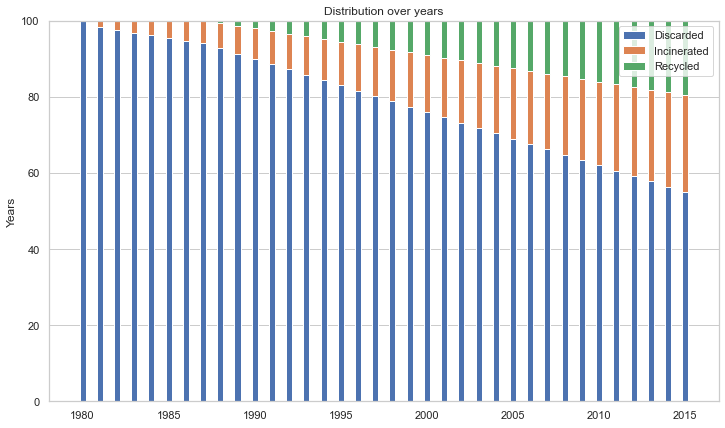

In [16]:
# World 03 - Plot: Stacked Bar chart

disposal_methods = {"Discarded": [], "Incinerated": [], "Recycled": []}
year_range = [df_World03.Year.min(), df_World03.Year.max() + 1]


years = []
for year in range(year_range[0], year_range[1]):
    years.append(year)
    df_World03_Year = df_World03[df_World03["Year"] == year]
    for disposal_method in list(disposal_methods.keys()):
        df_World03_Year_prod = df_World03_Year[df_World03_Year["Disposal Method"] == disposal_method]
        share = list(df_World03_Year_prod["Share of global plastic waste (%)"])[0]
        disposal_methods[disposal_method].append(share)
        
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 7))
for key in list(disposal_methods.keys()):
    disposal_methods[key] = np.array(disposal_methods[key])
    
ax.bar(years, disposal_methods['Discarded'], width, label='Discarded')
ax.bar(years, disposal_methods['Incinerated'], width, label='Incinerated', 
       bottom=disposal_methods['Discarded'])
ax.bar(years, disposal_methods['Recycled'], width, label='Recycled',
       bottom=(disposal_methods['Discarded']+disposal_methods['Incinerated']))

ax.set_ylabel('Years')
ax.set_title('Distribution over years')
ax.legend()

plt.show()

__Global 03: Plastic Disposal Methods__
<br>
<font color=Gray>
- How has global plastic waste disposal method changed over time? In the chart we see the share of global plastic waste that is discarded, recycled or incinerated from 1980 through to 2015.<br>
- Prior to 1980, recycling and incineration of plastic was negligible; 100% was therefore discarded. From 1980 for incineration, and 1990 for recycling, rates increased.
</font>

__----------------------------------------------__

In [17]:
# WORLD 04 : Plastic use by sector

file_World_04 = "PlasticPollution\plastic-production-by-sector.csv"
with open(file_World_04, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_World_04 = pd.read_csv(file_World_04, encoding='ISO-8859-1')

# Updated file
df_World04 = df_og_World_04.copy(deep=True)
df_World04

,Entity,Code,Year,Primary plastic production (million tonnes)
0,Additives,NaN,2015,25000000
1,All industrial sectors,NaN,2015,407000000
2,Building and Construction,NaN,2015,65000000
3,Consumer & Institutional Products,NaN,2015,42000000
4,Electrical/Electronic,NaN,2015,18000000
5,HDPE,NaN,2015,52000000
6,Industrial Machinery,NaN,2015,3000000
7,"LD, LDPE",NaN,2015,64000000
8,Other polymer type,NaN,2015,16000000
9,Other sectors,NaN,2015,47000000


In [18]:
# Drop Code column
df_World04 = df_World04.drop('Code', 1)


# Renaming columns
df_World04 = df_World04.rename(columns={'Primary plastic production (million tonnes)': 'Quantity (million tonnes)',
                                        'Entity': 'Sector'})
                               
df_World04

,Sector,Year,Quantity (million tonnes)
0,Additives,2015,25000000
1,All industrial sectors,2015,407000000
2,Building and Construction,2015,65000000
3,Consumer & Institutional Products,2015,42000000
4,Electrical/Electronic,2015,18000000
5,HDPE,2015,52000000
6,Industrial Machinery,2015,3000000
7,"LD, LDPE",2015,64000000
8,Other polymer type,2015,16000000
9,Other sectors,2015,47000000


In [19]:
df_World04 = df_World04.dropna(how = "all")

# Checking no. of data columns
len(df_World04)

19

In [20]:
df_World04.dtypes.to_dict()

{'Sector': dtype('O'),
 'Year': dtype('int64'),
 'Quantity (million tonnes)': dtype('int64')}

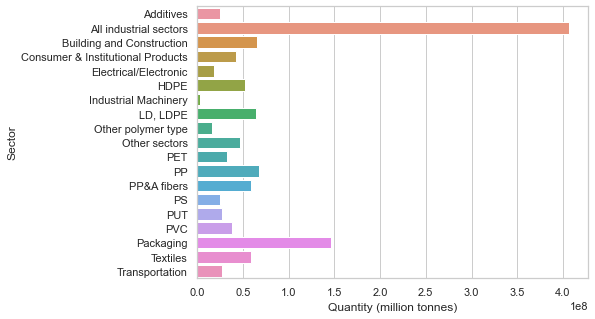

In [21]:
# World 04 - Plot: Bar char
plt.figure(figsize=(7, 5))
# quantity_count = df_World04['Quantity (million tonnes)'].value_counts()

ax = sns.barplot(data=df_World04, y="Sector", x="Quantity (million tonnes)")
# ax.set(xlabel="Sectors", ylabel="Quantity (million tonnes)")

__Global 04: Plastic use by sector__
<br>
<font color=Gray>
- Packaging was the dominant use of primary plastics, with 42 percent of plastics entering the use phase.<br>
- Building and construction was the second largest sector utilizing 19 percent of the total. Primary plastic production does not directly reflect plastic waste generation (as shown in the next section), since this is also influenced by the polymer type and lifetime of the end product.
</font>

__----------------------------------------------__

In [22]:
# WORLD 05 : Plastic waste by sector

file_World_05 = "PlasticPollution\plastic-waste-by-sector.csv"
with open(file_World_05, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_World_05 = pd.read_csv(file_World_05, encoding='ISO-8859-1')

# Updated file
df_World05 = df_og_World_05.copy(deep=True)
df_World05

,Entity,Code,Year,Primary plastic waste generation (million tonnes)
0,Additives,NaN,2015,17000000
1,All industrial sectors,NaN,2015,302000000
2,Building and Construction,NaN,2015,13000000
3,Consumer & Institutional Products,NaN,2015,37000000
4,Electrical/Electronic,NaN,2015,13000000
5,HDPE,NaN,2015,40000000
6,Industrial Machinery,NaN,2015,1000000
7,"LD, LDPE",NaN,2015,57000000
8,Other polymer type,NaN,2015,11000000
9,Other sectors,NaN,2015,38000000


In [23]:
# Drop Code column
df_World05 = df_World05.drop('Code', 1)


# Renaming columns
df_World05 = df_World05.rename(columns={'Primary plastic waste generation (million tonnes)': 'Quantity (million tonnes)',
                                        'Entity': 'Sector'})

df_World05

,Sector,Year,Quantity (million tonnes)
0,Additives,2015,17000000
1,All industrial sectors,2015,302000000
2,Building and Construction,2015,13000000
3,Consumer & Institutional Products,2015,37000000
4,Electrical/Electronic,2015,13000000
5,HDPE,2015,40000000
6,Industrial Machinery,2015,1000000
7,"LD, LDPE",2015,57000000
8,Other polymer type,2015,11000000
9,Other sectors,2015,38000000


In [24]:
df_World05 = df_World05.dropna(how = "all")

# Rows to drop
df_World05 = df_World05.drop(1, 0)

# Checking no. of data columns
len(df_World05)

18

In [25]:
df_World05.dtypes.to_dict()

{'Sector': dtype('O'),
 'Year': dtype('int64'),
 'Quantity (million tonnes)': dtype('int64')}

[Text(0, 0.5, 'Sector'), Text(0.5, 0, 'Quantity (million tonnes)')]

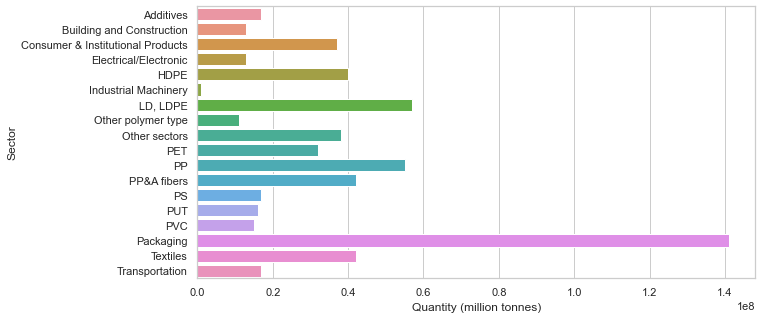

In [26]:
# World 05 - Plot: Bar char

plt.figure(figsize=(10, 5))

year_count = df_World05['Year'].value_counts()

ax = sns.barplot(data=df_World05, y="Sector", x="Quantity (million tonnes)")
ax.set(xlabel="Quantity (million tonnes)", ylabel="Sector")

__Global 05: Plastic waste by sector__
<br>
<font color=Gray>
- Packaging is the dominant generator of plastic waste, responsible for almost half of the global total. <br>
- Packaging has a very short ‘in-use’ lifetime (typically around 6 months or less). This is in contrast to building and construction, where plastic use has a mean lifetime of 35 years.
</font>

__----------------------------------------------__

In [27]:
# WORLD 06 : Mean product lifetime of plastic uses

file_World_06 = "PlasticPollution\mean-product-lifetime-plastic.csv"
with open(file_World_06, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

# Original file
df_og_World_06 = pd.read_csv(file_World_06, encoding='ISO-8859-1')

# Updated file
df_World06 = df_og_World_06.copy(deep=True)
df_World06

,Entity,Code,Year,Mean product lifetime (years)
0,Building and Construction,NaN,2015,35.0
1,Consumer & Institutional Products,NaN,2015,3.0
2,Electrical/Electronic,NaN,2015,8.0
3,Industrial Machinery,NaN,2015,20.0
4,Other sector,NaN,2015,5.0
5,Packaging,NaN,2015,0.5
6,Textiles,NaN,2015,5.0
7,Transportation,NaN,2015,13.0


In [30]:
# Drop Code column
df_World06 = df_World06.drop('Code', 1)


# Renaming columns
df_World06 = df_World06.rename(columns={'Entity': 'Sector'})

df_World06

,Sector,Year,Mean product lifetime (years)
0,Building and Construction,2015,35.0
1,Consumer & Institutional Products,2015,3.0
2,Electrical/Electronic,2015,8.0
3,Industrial Machinery,2015,20.0
4,Other sector,2015,5.0
5,Packaging,2015,0.5
6,Textiles,2015,5.0
7,Transportation,2015,13.0


In [31]:
df_World05.dtypes.to_dict()

{'Sector': dtype('O'),
 'Year': dtype('int64'),
 'Quantity (million tonnes)': dtype('int64')}

[Text(0, 0.5, 'Sectors'), Text(0.5, 0, 'Mean product lifetime (years)')]

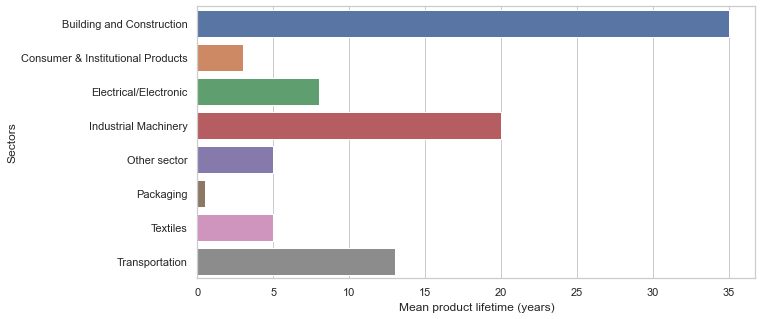

In [32]:
# World 06 - Plot: Bar char

plt.figure(figsize=(10, 5))

year_count = df_World06['Year'].value_counts()

ax = sns.barplot(data=df_World06, y="Sector", x="Mean product lifetime (years)")
ax.set(xlabel="Mean product lifetime (years)", ylabel="Sectors")

__Global 06: Mean product lifetime of plastic uses__


__----------------------------------------------__

__Can explore change in plastic fate to 2050, 1980 to 2050 - Linear Regression__

In [29]:
# Exporting cleaned datafile in .csv format
# df_World01.to_csv("global-plastics-production_Edited.csv")
# df_World02.to_csv("cumulative-global-plastics_Edited.csv")
# df_World03.to_csv("global-plastic-fate_Edited.csv")
# df_World04.to_csv("plastic-production-by-sector_Edited.csv")
# df_World05.to_csv("plastic-waste-by-sector_Edited.csv")
# df_World06.to_csv("mean-product-lifetime-plastic_Edited.csv")